# Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras
The following implementation of the model is mostly taken from the tutorial available [here]( https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/). 
</br>

The [Modified National Institute of Standards and Technology dataset](http://yann.lecun.com/exdb/mnist/) __(MNIST)__ handwritten digit classification problem is a standard dataset used in computer vision and deep learning. The dataset can be used as the basis for learning and practicing how to develop, evaluate, and use Convolutional Neural Networks __(CNN)__ for image classification.  
</br>

__Objective__: classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9 inclusively.

### 1) MNIST Handwritten Digit Classification Dataset
The MNIST dataset is made up of 70,000  examples. The dataset is comprised by small square 28x28 pixel grayscale images of handwritten single digits between 0 to 9.

#### 1.1 Load the MNIST dataset and plot the first nine images

In [28]:
from numpy import mean
from numpy import std
from keras.datasets import mnist
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.models import load_model
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import KFold
import  matplotlib.pyplot as plt

# load dataset
(trainX, trainY), (testX, testY)=mnist.load_data()

In [29]:
 
# Show dataset characteristics
print('Training set: X=%s, Y=%s' % (trainX.shape, trainY.shape))
print('Test set: X=%s, Y=%s' % (testX.shape, testY.shape))

Training set: X=(60000, 28, 28), Y=(60000,)
Test set: X=(10000, 28, 28), Y=(10000,)


From the results above it is possible to conclude that there are 60,000 examples in the training dataset and 10,000 examples in the test dataset

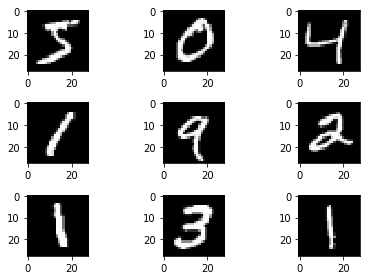

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=3)
ax = axes.ravel()

# Plot the first ten images in the dataset
for i in range(9):
    # plot raw pixel data
    ax[i].imshow(trainX[i], cmap = 'gray')

# show the figure
plt.tight_layout()
plt.show()

### 2) Model Evaluation Methodology
__MNIST__ is a useful starting point for developing and practicing a methology for solving image classification tasks using __CNN__. 

#### 2.1 Validation dataset
In order to estimate the performance of a model for a given training run it is feasible to split the training set into a train and validation dataset.  
Performance on the train and validation dataset over each run can be plotted to provide learning curves and insight into how well a model is learning the problem.  
__Keras API__ supports this by specifying the *validation_data* argument to the *model.fit()* function when training the model. This returns an object that describes model performance for the chosen loss and metrics on each training epoch.

#### 2.2 Cross Validation 
According to this [tutorial](https://machinelearningmastery.com/k-fold-cross-validation/), In order to estimate the performance of a model on the problem in general, it is viable to use *k-fold cross-validation*.  
__k-fold cross-validation__ is a statistical method used to estimate the skill of Machine Learning models. It is commonly used to compare and select a model for a given predictive modeling problem because it is easy to understand and implement and results in skill estimates that generally have a lower bias than other methods. It uses  a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not adopted during the training of the model. Its only parameter is *k* which represents the number of groups that a given data sample is to be split into.  
This method works by dividing the data into folds and [ensuring that each fold is used as a testing set](https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833) at some point.  
    &nbsp;&nbsp;&nbsp;&nbsp;__PROCEDURE:__  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1) Shuffle the dataset randomly  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2) Split the dataset into k groups  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3) For each unique group:
     1. Take the group as a hold out or test dataset  
     2. Take the remaining groups as a training dataset
     3. Fit a model on the training set and evaluate it on the test set
     4. Retain the evaluation score and discard the model  
 &nbsp; &nbsp; &nbsp; &nbsp;4) Summarize the skill of the model using the sample of model evaluation scores
 
 __Important:__ each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the test set 1 time and used to train the model k-1 times.
    
    

*"This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k-1 folds"*
[An introduction to Statistical Learning](https://www.amazon.com/Introduction-Statistical-Learning-Applications-Statistics/dp/1461471370/ref=as_li_ss_tl?_encoding=UTF8&pd_rd_i=1461471370&pd_rd_r=DB2D7SXCC6EFZ5MKNVK4&pd_rd_w=mz608&pd_rd_wg=PE5Zx&psc=1&refRID=DB2D7SXCC6EFZ5MKNVK4&linkCode=sl1&tag=inspiredalgor-20&linkId=1c22848a7baf8c3bed24b13800cf39e6)

### 3) How to develop a Baseline Model
The Baseline Model involves developing the infraestructure for the test harness so that any model we design can be evaluated on the dataset, and it establishes a baseline model performance on the problem, by which all improvements can be compared.


#### 3.1 Prepare dataset
Color images have height, width and color channel dimensions.  
The images were previously loaded, and because of the known characteristics of the images available in the dataset, we can reshape the data arrays to have a single color channel. 

In [31]:
# Reshape the dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0],28,28,1))
testX = testX.reshape((testX.shape[0],28,28,1))

There are 10 classes that are represented as unique integers. Because of this it is possible to use a [one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 for the index of other classes. The *to_categorical()* utility function allows us to do it. 

In [5]:
# One hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

Previous behaviours and data loading can be unified in a single *load_dataset()* function

In [32]:
def load_dataset():
    # Load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # Reshape the dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0],28,28,1))
    testX = testX.reshape((testX.shape[0],28,28,1))
    # One hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

#### 3.2 Prepare Pixel Data
Pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255. Although the best way to scale the pixel values for modeling is not known, it is clear that some scaling is required.    
A good starting point is to normalize the pixel values of grayscale image, e.g. rescale them to the range [0,1]. To achieve the latter is is necessary to convert the data type from unsigned integers to floats and then divide the pixel values by the maximum value.

In [7]:
# Scale pixels
def prep_pixels(train, test):
    # Step1: convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Step2: normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # Step3: return normalized images
    return train_norm, test_norm

#### 3.3 Define Model
The model has [__two main aspects:__](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) the feature extraction front end comprised of [convolutional](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/) and [pooling layers](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/), and the classifier backend that will make a prediction.  
</br>

__1.__ It can start with a single convolutional layer with a small filter size(3,3) and a modest number of filters (32) followed by a max pooling layer. The filter maps can then be flattened to provide features to the classifier.  
__2.__ Because of the multiclass classification task problem, we require an output layer with 10 nodes in order to predict the probability distribution of an image belonging to each of the 10 classes, this will also require the use of a [softmax activation function](https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d).  
__3.__ Between the feature extractor and the output layer, we can add a dense later to interpret the features, in this case with 100 nodes.   
__4.__ Use a conservative configuration for the [stochastic gradient descent optimizer](https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/) with a learning rate of 0.01 and a momentum of 0.9. The categorical [cross-entropy loss function](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html) will be optimized, suitable for multi-class classification. We will monitor the classification accuracy metric, given we have the same number of examples in each of the 10 classes. 

__Note:__ All layers will use the [ReLu activation function](https://medium.com/tinymind/a-practical-guide-to-relu-b83ca804f1f7) and the [He weight initialization](https://medium.com/@prateekvishnu/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528) scheme.

In [33]:
# Define CNN model
def define_model():
    # Sequential model: linear stack of layers
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))
    
    # Compile Model
    opt = SGD(lr = 0.01, momentum = 0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### 3.4 Evaluate Model
The Model will be evaluated using five-fold cross-validation. Parameter *k=5* was chosen to provide a baseline for both repeated evaluation and to not be very large as to require a long running time.  
Each test set will be 20% of the training dataset, or about 12,000 examples, close to the actual size of the test set for this problem.
</br>

The baseline model will be trained for a modest 10 training epochs with a default batch size of 32 examples. The test set for each fold will be used to evaluate the model both during each epoch for the training run, so that we can later create learning curves, and at the end of the run, so that we can estimate the performance of the model.  


In [9]:
# Evaluate a model using k-fold cross-validation
def evaluate_model(model, dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # Prepare cross validation
    kfold = KFold(n_folds, shuffle = True, random_state = 1)
    
    # Enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model, verbose modified to 1 to view the progress bar
        history = model.fit(trainX, trainY, epochs = 10,batch_size = 32, validation_data = (testX, testY), verbose = 1)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose = 1)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories
        

#### 3.5 Present Results
There are two key aspects to present: the diagnostics of the learning behaviour of the model during training and the estimation of the model performance. These can be implemented in different functions.
</br>

The __diagnostics__ will show the model performance on the train and test set during each fold of the k-fold cross-validation. *Blue lines* indicate model performance on the training dataset and *orange lines* will indicate performance on the test dataset. 

In [10]:
# Plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color = 'blue', label = 'train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['acc'], color='blue', label='train')
        plt.plot(histories[i].history['val_acc'], color='orange', label='test')
    plt.show()

The classification accuracy scores collected during each fold can be summarized by calculating the mean and standard deviation. This provides an estimate of the average expected performance of the model trained on this dataset, with an estimate of the average variance in the mean

In [11]:
# Summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots od results
    plt.boxplot(scores)
    plt.show()

#### 3.6 Complete example

In [12]:
# Run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # evaluate model
    scores, histories = evaluate_model(model, trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

### 4) How to Develop an Improved Model 

#### 4.1 Modifying Learning Rate

There are many aspects of the learning algorithm that can be explored for improvement.
Perhaps the point of biggest leverage is the learning rate, such as evaluating the impact that smaller or larger values of the learning rate may have, as well as schedules that change the learning rate during training.

#### 4.2 Modifying Batch Normalization
[Batch normalization](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c) can be used after convolutional and fully connected layers. It has the effect of changing the distribution of the output of the layer, specifically by standardizing the outputs. This has the effect of stabilizing and accelerating the learning process.  
It is feasible to update the model definition to use batch normalization after the activation function for the convolutional and dense layers of the previous model.

In [13]:
def define_model_normalized():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
# Run the test harness for evaluating a model
def run_test_harness_normalized():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_normalized()
    # evaluate model
    scores, histories = evaluate_model(model, trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

### 5) How to Finalize the Model and Make Predictions
#### 5.1 Save the model to file for later use
A final model is typically fit on all available data, such as the combination of all train and test dataset. For this case we hold back a test dataset so that we can estimate the performance of the final model.

In [16]:
# Run the test harness for evaluating a model
def run_test_harness_saving():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model_normalized()
    # evaluate model
    scores, histories = evaluate_model(model, trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
    # fit model
    model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
    # save model
    model.save('final_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 26s 536us/step - loss: 0.1400 - acc: 0.9577 - val_loss: 0.0712 - val_acc: 0.9791
Epoch 2/10
48000/48000 [==============================] - 25s 525us/step - loss: 0.0502 - acc: 0.9845 - val_loss: 0.0691 - val_acc: 0.9802
Epoch 3/10
48000/48000 [==============================] - 26s 542us/step - loss: 0.0300 - acc: 0.9907 - val_loss: 0.0589 - val_acc: 0.9824
Epoch 4/10
48000/48000 [==============================] - 26s 547us/step - loss: 0.0209 - acc: 0.9935 - val_loss: 0.0565 - val_acc: 0.9838
Epoch 5/10
48000/48000 [==============================] - 26s 549us/step - loss: 0.0141 - acc: 0.9957 - val_loss: 0.0584 - val_acc: 0.9834
Epoch 6/10
48000/48000 [==============================] - 26s 544us/step - loss: 0.0093 - acc: 0.9977 - val_loss: 0.0549 - val_acc: 0.9

12000/12000 [==============================] - 2s 195us/step
> 99.992


C:\Users\Valentina\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


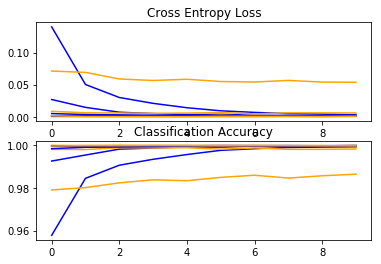

Accuracy: mean=99.687 std=0.522, n=5


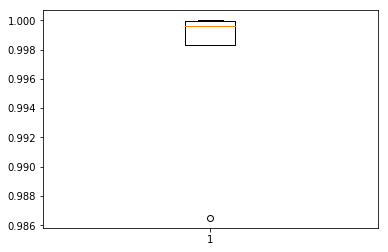

In [17]:
# entry point, run the test harness
run_test_harness_saving()

#### 5.2 Evaluate Final Model
A final model is typically fit on all available data, such as the combination of all train and test dataset. For this case we hold back a test dataset so that we can estimate the performance of the final model.

In [22]:
# run the test harness for evaluating a model
def run_test_harness_loading():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # load model
    model = load_model('final_model.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

In [23]:
# entry point, run the test harness
run_test_harness_loading()

> 98.980


#### 5.3 Make prediction

The model assumes that new images are grayscale, that they have been aligned so that one image contains one centered handwritten digit, and that the size of the image is square with the size 28x28

In [26]:
# Make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    digit = model.predict_classes(img)
    print(digit[0])

In [27]:
# entry point, run the example
run_example()

7


In [35]:
import tensorflow as tf
print(tf.__version__)

1.13.1
